In [ ]:
# Project by Ayush Agarwal 
# PROJECT - WEIGHT PREDICTION AND OPTIMUM WEIGHT SUGGESTION USING USER HEIGHT
# IIT BHU Varanasi , Electronics Engineering Student 
# ayush.agarwal.ece20@itbhu.ac.in
# https://www.linkedin.com/in/ayush-agarwal-261041215/
# https://github.com/ayush-agarwal-0502

In [77]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [78]:
X = pd.read_csv("/content/weight-height.csv")
#height input - weight output 

In [79]:
print("The training data looks like :")
print(X.head())
print(X.columns)

The training data looks like :
  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
Index(['Gender', 'Height', 'Weight'], dtype='object')


In [80]:
# lb to kg and inches to cm 
X['Weight'] = X['Weight'] * 0.454
X['Height'] = X['Height'] * 2.54

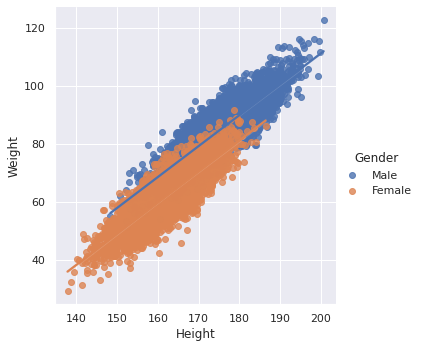

In [81]:
sns.lmplot(x='Height', y="Weight", hue='Gender', data=X)
plt.show()

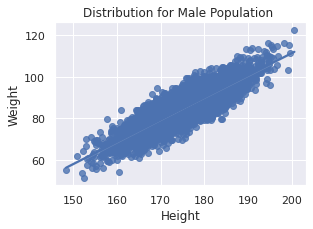

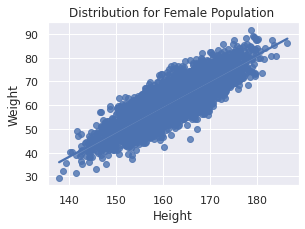

In [82]:
X_male = X.loc[X['Gender']=="Male"]
X_female = X.loc[X['Gender']=="Female"]
sns.regplot(x=X_male['Height'],y=X_male['Weight'])
plt.title("Distribution for Male Population ")
plt.show()
plt.title("Distribution for Female Population ")
sns.regplot(x=X_female['Height'],y=X_female['Weight'])
plt.show()

In [83]:
# checking missing values 
# X1 is the number of null values in each column 
X1 = X.isnull().sum().to_numpy()
print(X1)

[0 0 0]


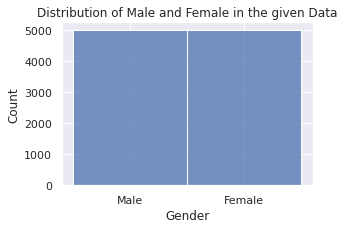

In [84]:
sns.histplot(X['Gender'])
plt.title("Distribution of Male and Female in the given Data")
plt.show()

In [85]:
# sns.set(rc={"figure.figsize":(4.5, 3)})
# sns.kdeplot(data=X_male['Weight'], shade=True)
# plt.title("Male Weight Distribution")
# plt.show()
# sns.kdeplot(data=X_male['Height'], shade=True)
# plt.title("Male Height Distribution")
# plt.show()
# sns.kdeplot(data=X_female['Weight'], shade=True)
# plt.title("Female Weight Distribution")
# plt.show()
# sns.kdeplot(data=X_female['Height'], shade=True)
# plt.title("Female Height Distribution")
# plt.show()

In [86]:
Y_male = X_male['Weight']
Y_female = X_female['Weight']
X_male.drop(['Weight','Gender'],axis=1,inplace=True)
X_female.drop(['Weight','Gender'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [87]:
from sklearn.model_selection import train_test_split
X_male_train, X_male_valid, y_male_train, y_male_valid = train_test_split(X_male, Y_male, train_size=0.8, test_size=0.2,random_state=0)
X_female_train, X_female_valid, y_female_train, y_female_valid = train_test_split(X_female, Y_female, train_size=0.8, test_size=0.2,random_state=0)

In [88]:
from sklearn.linear_model import LinearRegression

# print(X_male_train.head())
lin_reg_male = LinearRegression()
lin_reg_male.fit(X_male_train,y_male_train)
train_pred_male = lin_reg_male.predict(X_male_train)
test_pred_male = lin_reg_male.predict(X_male_valid)

lin_reg_female = LinearRegression()
lin_reg_female.fit(X_female_train,y_female_train)
train_pred_female = lin_reg_female.predict(X_female_train)
test_pred_female = lin_reg_female.predict(X_female_valid)

In [89]:
from sklearn.metrics import mean_squared_error
import math 
from math import sqrt 

rmse_train_male = sqrt(mean_squared_error(y_male_train,train_pred_male))
rmse_test_male = sqrt(mean_squared_error(y_male_valid,test_pred_male))

print("The value of RMSE on training model for male weight is :")
print(rmse_train_male)
print("And the value of RMSE on the testing data is :")
print(rmse_test_male)

rmse_train_female = sqrt(mean_squared_error(y_female_train,train_pred_female))
rmse_test_female = sqrt(mean_squared_error(y_female_valid,test_pred_female))

print("The value of RMSE on training model for female weight is :")
print(rmse_train_female)
print("And the value of RMSE on the testing data is :")
print(rmse_test_female)

The value of RMSE on training model for male weight is :
4.5403598322673355
And the value of RMSE on the testing data is :
4.523439244399997
The value of RMSE on training model for female weight is :
4.568018761979679
And the value of RMSE on the testing data is :
4.5000790739250185


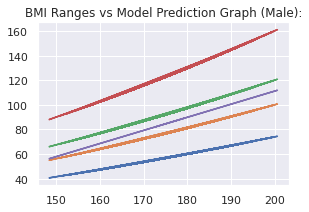

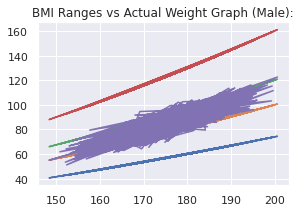

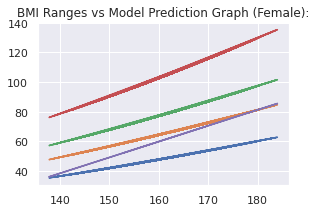

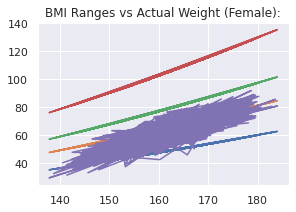

In [96]:
# BMI = (Weight (in Kg))/(Height^2 (in m^2))
# Weight = (BMI * (Height^2))
# y = a x^2 relation 
# y = 10^(-4)*x^2
x = X_male_train
plt.plot(x, 18.5*(10**(-4))*(x**2)) 
plt.plot(x, 25*(10**(-4))*(x**2)) 
plt.plot(x, 30*(10**(-4))*(x**2)) 
plt.plot(x, 40*(10**(-4))*(x**2)) 
plt.plot(x,train_pred_male)
plt.title("BMI Ranges vs Model Prediction Graph (Male):")
plt.show()

plt.plot(x, 18.5*(10**(-4))*(x**2)) 
plt.plot(x, 25*(10**(-4))*(x**2)) 
plt.plot(x, 30*(10**(-4))*(x**2)) 
plt.plot(x, 40*(10**(-4))*(x**2)) 
plt.plot(x,y_male_train)
plt.title("BMI Ranges vs Actual Weight Graph (Male):")
plt.show()

x = X_female_train
plt.plot(x, 18.5*(10**(-4))*(x**2)) 
plt.plot(x, 25*(10**(-4))*(x**2)) 
plt.plot(x, 30*(10**(-4))*(x**2)) 
plt.plot(x, 40*(10**(-4))*(x**2)) 
plt.plot(x,train_pred_female)
plt.title("BMI Ranges vs Model Prediction Graph (Female):")
plt.show()

plt.plot(x, 18.5*(10**(-4))*(x**2)) 
plt.plot(x, 25*(10**(-4))*(x**2)) 
plt.plot(x, 30*(10**(-4))*(x**2)) 
plt.plot(x, 40*(10**(-4))*(x**2)) 
plt.plot(x,y_female_train)
plt.title("BMI Ranges vs Actual Weight (Female):")
plt.show()

In [113]:
print("Hi , this Machine Learning Model tries to guess your weight based on your height ")
print("If male enter M , if female enter input F")
A = str(input("PRESS M/F:"))
if(A!="M" and A!="F"):
  print("Please press the correct key .")
else:
  H = int(input("Please enter your height in cm :"))
  if(A=="M"):
    W = lin_reg_male.predict([[H]])
    W.reshape(-1, 1)
    print("Your weight as per the model could be between "+str(int(W*0.98*10)/10)+" and "+str(int(W*1.02*10)/10))
    print("The model estimates your weight based on the sample weights of the population of the data we have")
  if(A=="F"):
    W = lin_reg_female.predict([[H]])
    W.reshape(-1, 1)
    print("Your weight as per the model could be between "+str(int(W*0.98*10)/10)+" and "+str(int(W*1.02*10)/10))
  print("The optimal weight for your height considering optimal BMI between 18.5 to 25 is from "+str(int(10*18.5*(10**(-4))*(H**2))/10)+" to "+str(int(10*25*(10**(-4))*(H**2))/10))
  print()
  print()

Hi , this Machine Learning Model tries to guess your weight based on your height 
If male enter M , if female enter input F
PRESS M/F:M
Please enter your height in cm :220
Your weight as per the model could be between 129.7 and 135.0
The model estimates your weight based on the sample weights of the population of the data we have
The optimal weight for your height considering optimal BMI between 18.5 to 25 is 89.5 to 121.0




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Project by Ayush Agarwal 
# IIT BHU Varanasi , Electronics Engineering Student 
# ayush.agarwal.ece20@itbhu.ac.in
# https://www.linkedin.com/in/ayush-agarwal-261041215/
# https://github.com/ayush-agarwal-0502